# Fuzzy logic

Install following prerequisities:

In [ ]:
# Example
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=8f885c013f71b4860c56e171a2d77e42379b5aed5650a9b5b48fa68465a42308
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


# Example 1

Create fuzzy sets for input variable temperature


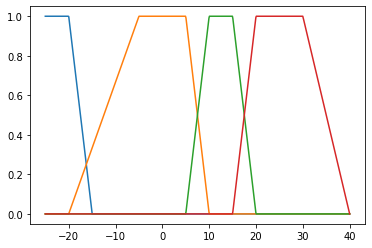

In [ ]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25,-20, -15])
cold=fuzz.trapmf(temp_x, [-20, -5, 5, 10])
warm=fuzz.trapmf(temp_x, [5,10, 15, 20])
hot=fuzz.trapmf(temp_x, [15, 20, 30, 40])
plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)
plt.plot(temp_x, hot)




In [ ]:
type(temp_x)


numpy.ndarray

## Task 1

Create fuzzy set for cold, warm and hot and plot all memebership functions to a single graph.

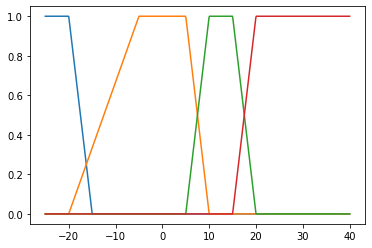

In [ ]:
temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold=fuzz.trapmf(temp_x, [-20, -5, 5, 10])
warm=fuzz.trapmf(temp_x, [5,10, 15, 20])
hot=fuzz.trapmf(temp_x, [15, 20, 40, 40])
plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)
plt.plot(temp_x, hot)

## Task 2

Create fuzzy sets low, medium, high for heating.

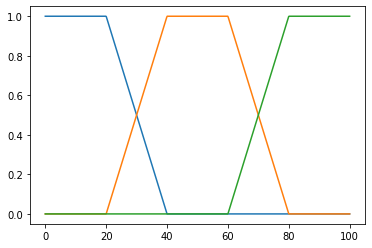

In [ ]:
heating = np.linspace(0,100,650)
low= fuzz.trapmf(heating, [0, 0,20,40])
med=fuzz.trapmf(heating, [20,40,60,80])
high=fuzz.trapmf(heating, [60,80,100, 100])
plt.plot(heating, low)
plt.plot(heating, med)
plt.plot(heating, high)

## Task 3

Create fuzzy sets closed, partially, half, nearly, open.

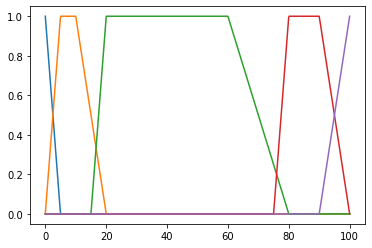

In [ ]:
window = np.linspace(0,100,650)
closed= fuzz.trapmf(window, [0, 0,0,5])
low= fuzz.trapmf(window, [0,5,10,20])
partially=fuzz.trapmf(window, [15,20,60,80])
nearly=fuzz.trapmf(window, [75,80,90, 100])
open= fuzz.trapmf(window, [90, 100,100,100])
plt.plot(window, closed)
plt.plot(window, low)
plt.plot(window, partially)
plt.plot(window, nearly)
plt.plot(window, open)



## Task 4

According to this tutorial create fuzzy system.
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html


Create rules for our fuzzy variable window, temperature, heating and observe the fuzzy output.

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
heating = ctrl.Consequent(np.arange(0, 100, 1), 'heating')
heating['low']= fuzz.trapmf(heating.universe, [0, 0,20,40])
heating['med']=fuzz.trapmf(heating.universe, [20,40,60,80])
heating['high']=fuzz.trapmf(heating.universe, [60,80,100, 100])


In [ ]:
temp = ctrl.Antecedent(np.arange(-25, 40, 1), 'temperature')
temp['very_cold'] = fuzz.trapmf(temp.universe, [-25, -25,-20, -15])
temp['cold']=fuzz.trapmf(temp.universe, [-20, -5, 5, 10])
temp['warm']=fuzz.trapmf(temp.universe, [5,10, 15, 20])
temp['hot']=fuzz.trapmf(temp.universe, [15, 20, 30, 40])


In [ ]:
window = ctrl.Antecedent(np.arange(0, 100, 1), 'window')
window['closed']= fuzz.trapmf(window.universe, [0,0,0,5])
window['low']= fuzz.trapmf(window.universe, [0,5,10,20])
window['partially']=fuzz.trapmf(window.universe, [15,20,60,80])
window['nearly']=fuzz.trapmf(window.universe, [75,80,90, 100])
window['open']= fuzz.trapmf(window.universe, [90, 100,100,100])


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb24a1f9990>)

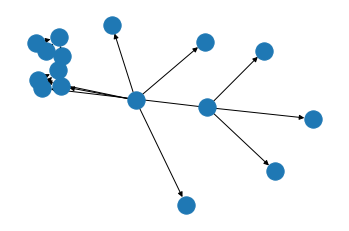

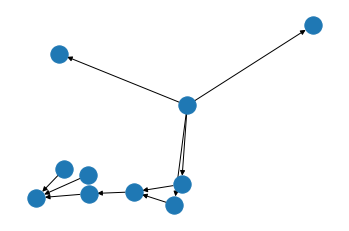

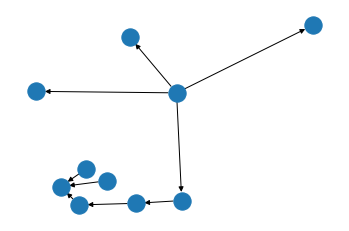

In [ ]:
rule2 = ctrl.Rule(temp['very_cold'] | temp['cold'] , heating['high'])
rule5 = ctrl.Rule(temp['warm'] &  window['closed'], heating['low'])
rule1 = ctrl.Rule(temp['warm'] & (window['partially'] | window['low']) , heating['med'])
rule4 = ctrl.Rule(temp['warm'] & (window['nearly'] | window['open']) , heating['high'])
rule3 = ctrl.Rule(temp['hot'] , heating['low'])
rule1.view()
rule2.view()
rule3.view()

In [ ]:
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])


In [ ]:
heatings = ctrl.ControlSystemSimulation(heating_ctrl)

82.0258525852585


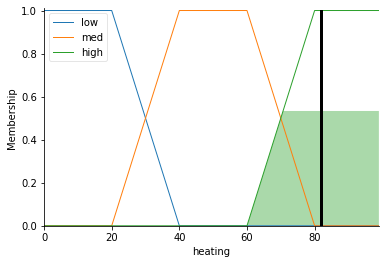

In [ ]:
heatings.input['temperature'] = -12
heatings.input['window'] = 80
heatings.compute()
print (heatings.output['heating'])
heating.view(sim=heatings)